# Population per subbasins of South Saskatchewan River, from irregular shapes to irregular shapes
## This example, remaps the population within the Canadian domain from Dessinimation Areas of 2016 to subbasins of South Saskatchewan river up to Medicine Hat

### Clean up and change writing of the file into a netcdf file

In [3]:
# Clean up the data and retain the population for dessinimation areas that are in the provided shapefile
import pandas as pd
import geopandas as gpd
import os
from easymore.easymore import easymore
esmr = easymore()


df = pd.read_csv('./data/Alberta_population/census_2016_DA_Canada.csv')
shp = gpd.read_file('./data/target_shapefiles/dissemination_area.shp')

# separate the population data from geographic code and population information
DA_info = df.drop(list(df.filter(regex='2016')), axis=1)
DA_info ['Geographic_code'] = DA_info ['Geographic_code'].astype(int)
shp = shp[['DAUID', 'lat', 'lon']]
shp ['DAUID'] = shp ['DAUID'].astype(int)
DA_info = pd.merge(DA_info,shp, how='left',left_on=['Geographic_code'], right_on=['DAUID'])
DA_info = DA_info.dropna()

#
population_data = df [['Geographic_code','Population_density_per_square_kilometre_2016']]
population_data = population_data[population_data.Geographic_code.isin(DA_info.Geographic_code)]
population_data = population_data.set_index('Geographic_code')
population_data.index.name = None
population_data = population_data.transpose()
population_data['time'] = pd.date_range('2016-01-01', periods=1, freq='AS')
population_data.set_index('time', inplace=True)

# 
ds_pop  = esmr.dataframe_to_netcdf_xr(population_data,
                                      variable_name = 'Population_Density',
                                      unit_of_variable = '-',
                                      variable_long_name = 'Population density per square kilometre 2016',
                                      Fill_value = '-9999',
                                      station_info_data = DA_info,
                                      station_info_column = 'Geographic_code')
#save the nect file
if os.path.isfile('./data/Alberta_population/census_2016_DA_Canada.nc'):
    os.remove('./data/Alberta_population/census_2016_DA_Canada.nc')
ds_pop.to_netcdf('./data/Alberta_population/census_2016_DA_Canada.nc')
ds_pop


EASYMORE version 1.0.0 is initiated.
EASYMORE detects that the input datafarame is pandas dataframe
EASYMORE detects that index is pandas datatime
EASYMORE detects that the station data is pandas dataframe
EASYMORE detects that the necessary information for the station are provided with transpose


<xarray.Dataset>
Dimensions:                             (time: 1, n: 4070)
Coordinates:
  * time                                (time) datetime64[ns] 2016-01-01
  * n                                   (n) int64 48010135 48010136 ... 59530261
Data variables:
    Population_Density                  (time, n) float64 0.4 11.4 ... 163.4
    Province                            (n) object 'Alberta' ... 'British Col...
    Geographic_code_Province            (n) object 48 48 48 48 ... 59 59 59 59
    Geographic_code_Census_division     (n) object 4801 4801 4801 ... 5953 5953
    Geographic_code_Census_subdivision  (n) object 4801003 4801003 ... 5953007
    DAUID                               (n) object 48010135.0 ... 59530261.0
    lat                                 (n) object 50.26959670358396 ... 52.8...
    lon                                 (n) object -110.1781726738691 ... -11...

## Remapping from dessimination area to subbasins using easymore

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'Dessimination_Area'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = './temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
esmr.target_shp_ID            = 'COMID' # if not provided easymore give ID according to shape order in shapefile
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = './data/Alberta_population/census_2016_DA_Canada.nc'
esmr.var_ID                   = 'DAUID' # name of variable ID in the netcdf file
esmr.var_lat                  = 'lat' # name of variable lat in the netcdf file
esmr.var_lon                  = 'lon' # name of variable lon in the netcdf file
# name of source shapefile (essential for case-3 if not Thiessen polygons)
esmr.source_shp               = './data/target_shapefiles/dissemination_area.shp' 
esmr.source_shp_lat           =  'lat' # name of column latitude in the source shapefile
esmr.source_shp_lon           =  'lon' # name of column longitude in the source shapefile
esmr.source_shp_ID            =  'DAUID' # name of ID in the source shapefile
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['Population_Density']
# location where the remapped netCDF file will be saved
esmr.output_dir               = './output/'
esmr.save_csv                 = True

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 1.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE will remap variable  Population_Density  from source file to variable  Population_Density  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'n']
EASYMORE detects that the longitude variables has dimensions of:
['n']
EASYMORE detects that the latitude variables has dimensions of:
['n']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-04-08 17:18:19.076660
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that the field for ID is provided in sink/target shapefile
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 projection;
for better appximation use the easymore e

/Users/shg096/opt/anaconda3/envs/easymore-env/lib/python3.8/site-packages/easymore/easymore.py:216: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shp_int.to_file(self.temp_dir+self.case_name+'_intersected_shapefile.shp') # save the intersected files


./temporary/Dessimination_AreaID_not_intersected.txt
Ended at date and time 2023-04-08 17:18:41.458460
It took 22.3818 seconds to finish creating of the remapping file
---------------------------
------REMAPPING------
netcdf output file will be compressed at level 4
Removing existing remapped .nc file.
Remapping ./data/Alberta_population/census_2016_DA_Canada.nc to ./output/Dessimination_Area_remapped_2016-01-01-00-00-00.nc 
Started at date and time 2023-04-08 17:18:41.527425 
Converting variable Population_Density from remapped file of ./output/Dessimination_Area_remapped_2016-01-01-00-00-00.nc to ./output/Dessimination_Area_remapped_Population_Density_-_2016-01-01-00-00-00.csv 
Saving the ID, lat, lon map at ./output/Dessimination_Area_remapped_Population_Density_-_2016-01-01-00-00-00.csv 
Ended at date and time 2023-04-08 17:18:41.578348 
It took 0.050923 seconds to finish the remapping of variable(s) 
---------------------
---------------------


## Visualziation

EASYMORE version 1.0.0 is initiated.
EASYMORE detects case 3 - irregular lat/lon; shapefile should be provided
EASYMORE detects that no variable for ID of the source netCDF file; an arbitatiry ID will be added
the closest time step to what is provided for vizualization  2016-01-01 00:00:00  is  2016-01-01 00:00:00
min: 0.0, max: 73294.8 for variable: Population_Density in source nc file for the time step: 2016-01-01 00:00:00
EASYMORE detects case 3 - irregular lat/lon; shapefile should be provided
EASYMORE detects that no variable for ID of the source netCDF file; an arbitatiry ID will be added
the closest time step to what is provided for vizualization  2016-01-01 00:00:00  is  2016-01-01 00:00:00
min: 0.0, max: 73294.8 for variable: Population_Density in source nc file for the time step: 2016-01-01 00:00:00
min: 0.0, max: 8511.231660898628 for variable: Population_Density in remapped nc file for the time step: 2016-01-01 00:00:00
EASYMORE detects case 3 - irregular lat/lon; shapefile

/Users/shg096/opt/anaconda3/envs/easymore-env/lib/python3.8/subprocess.py:946: ResourceWarning: subprocess 26016 is still running
  _warn("subprocess %s is still running" % self.pid,


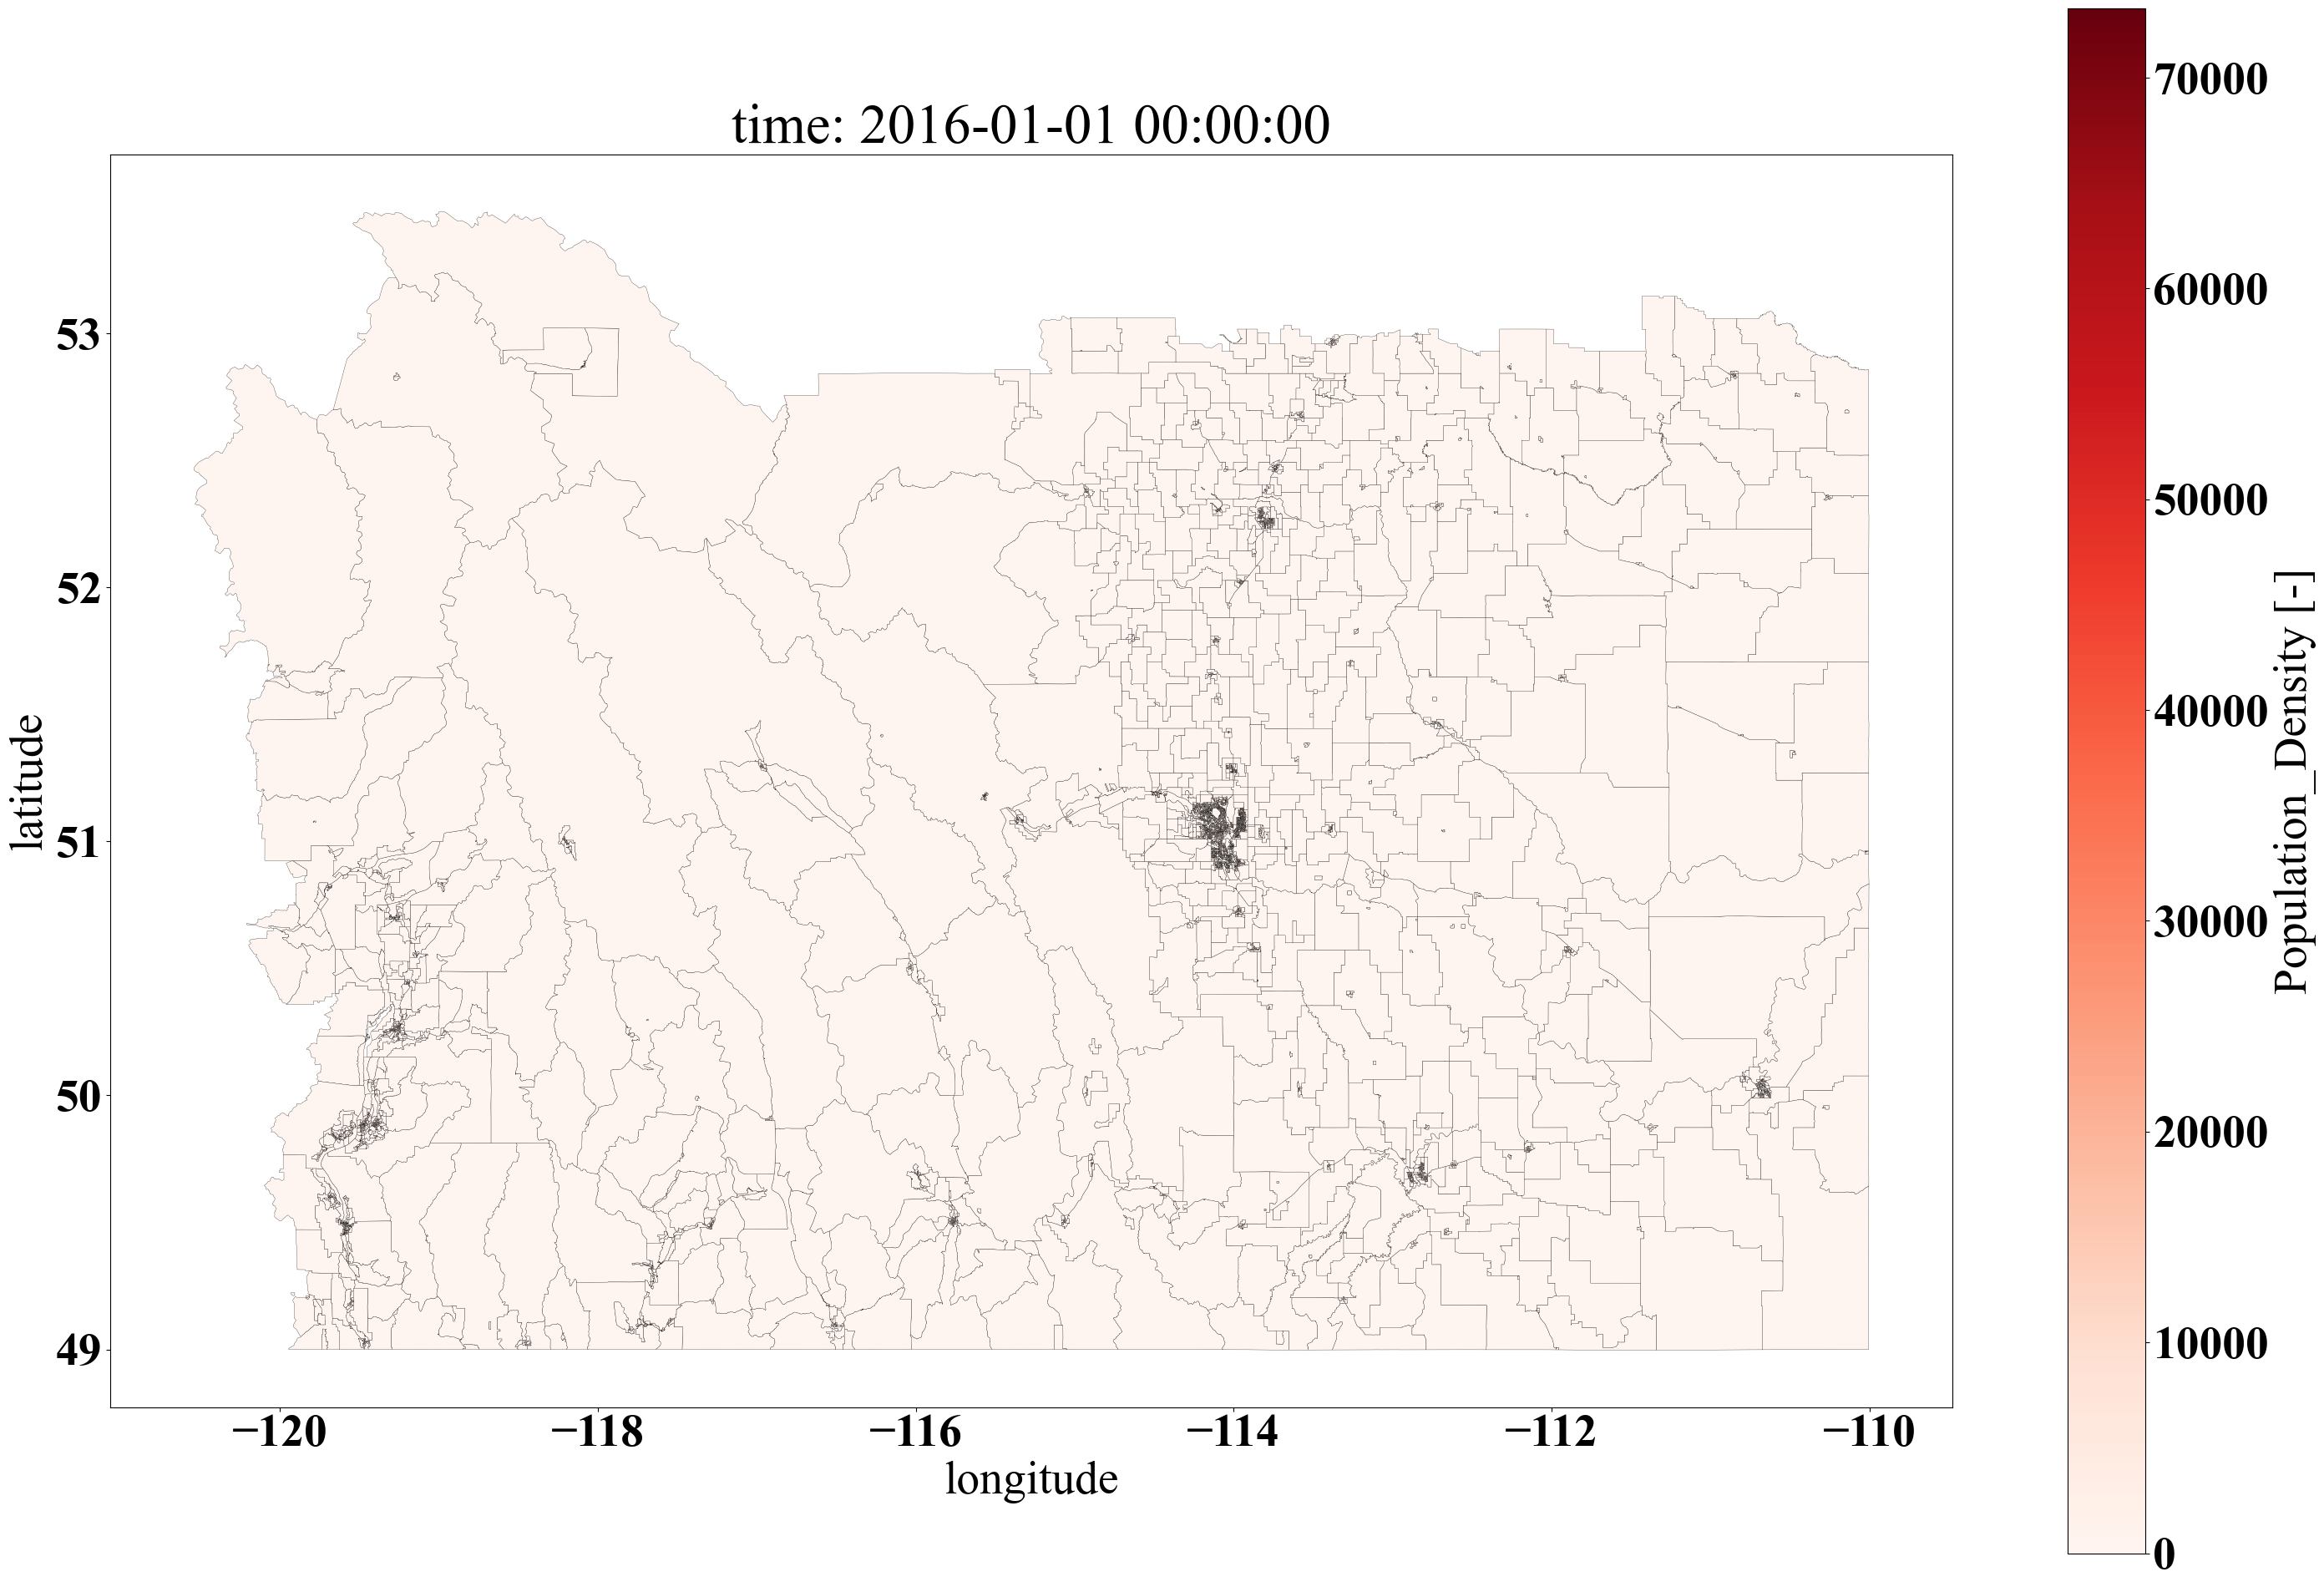

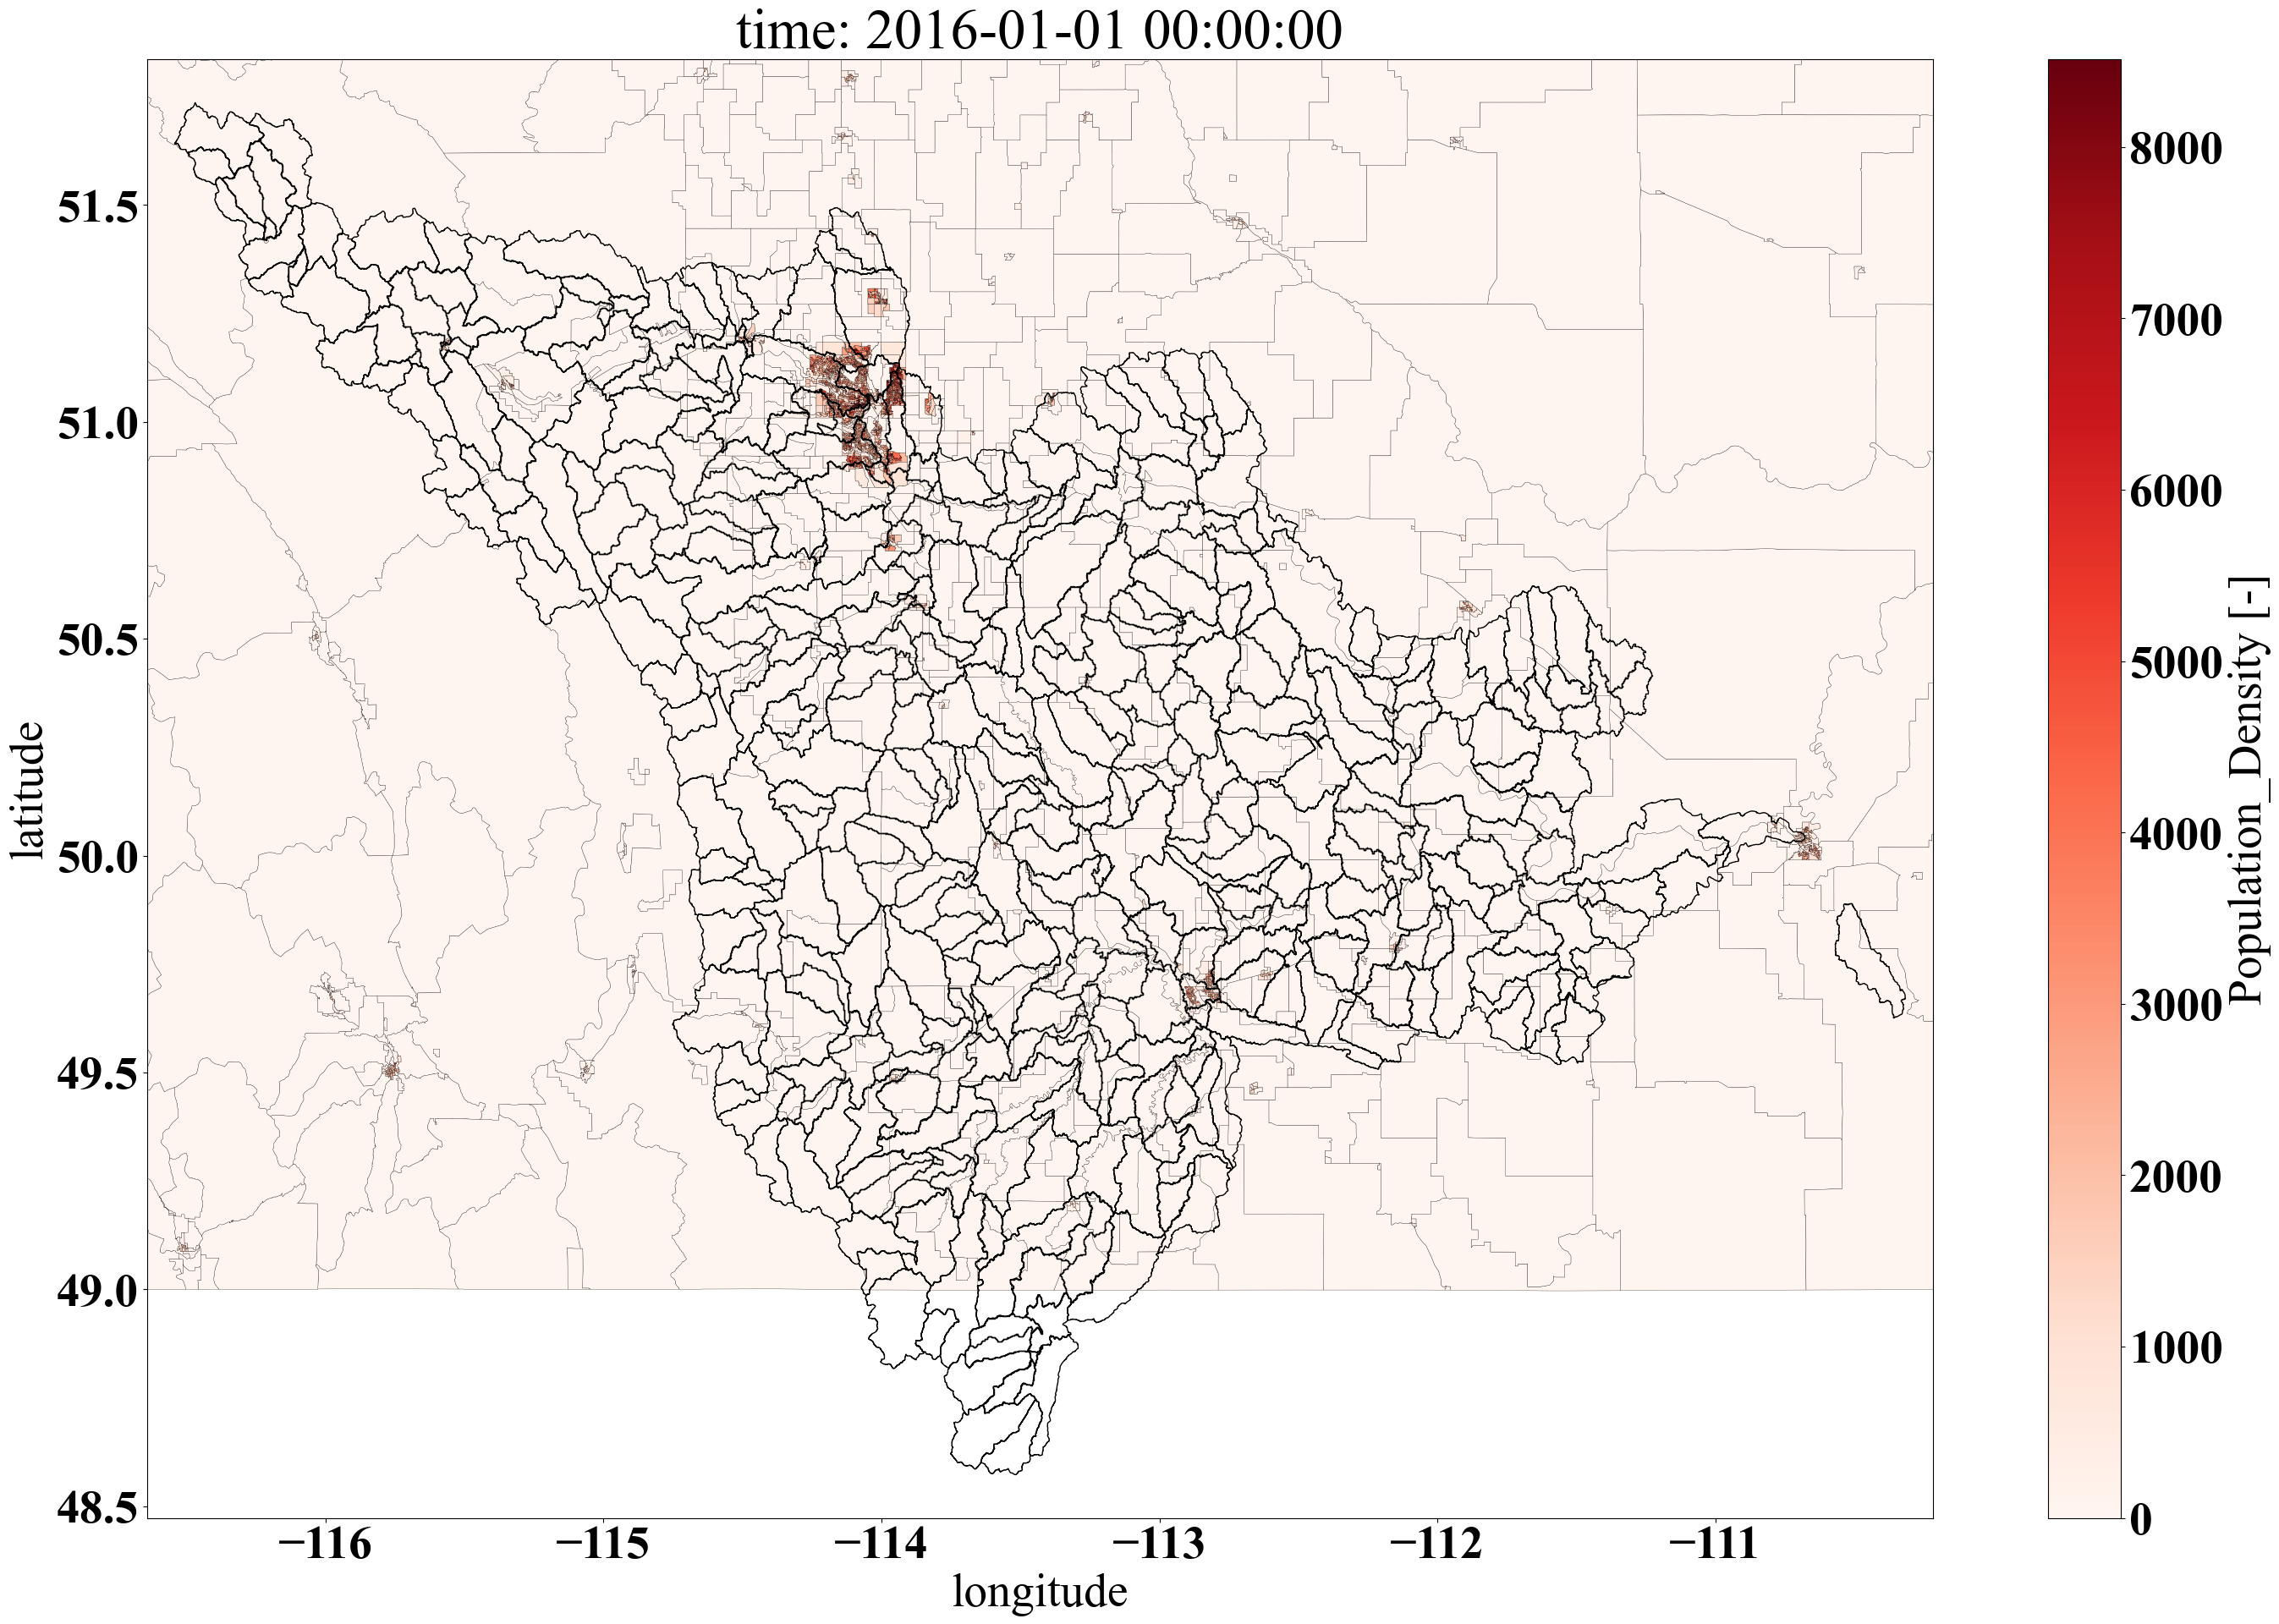

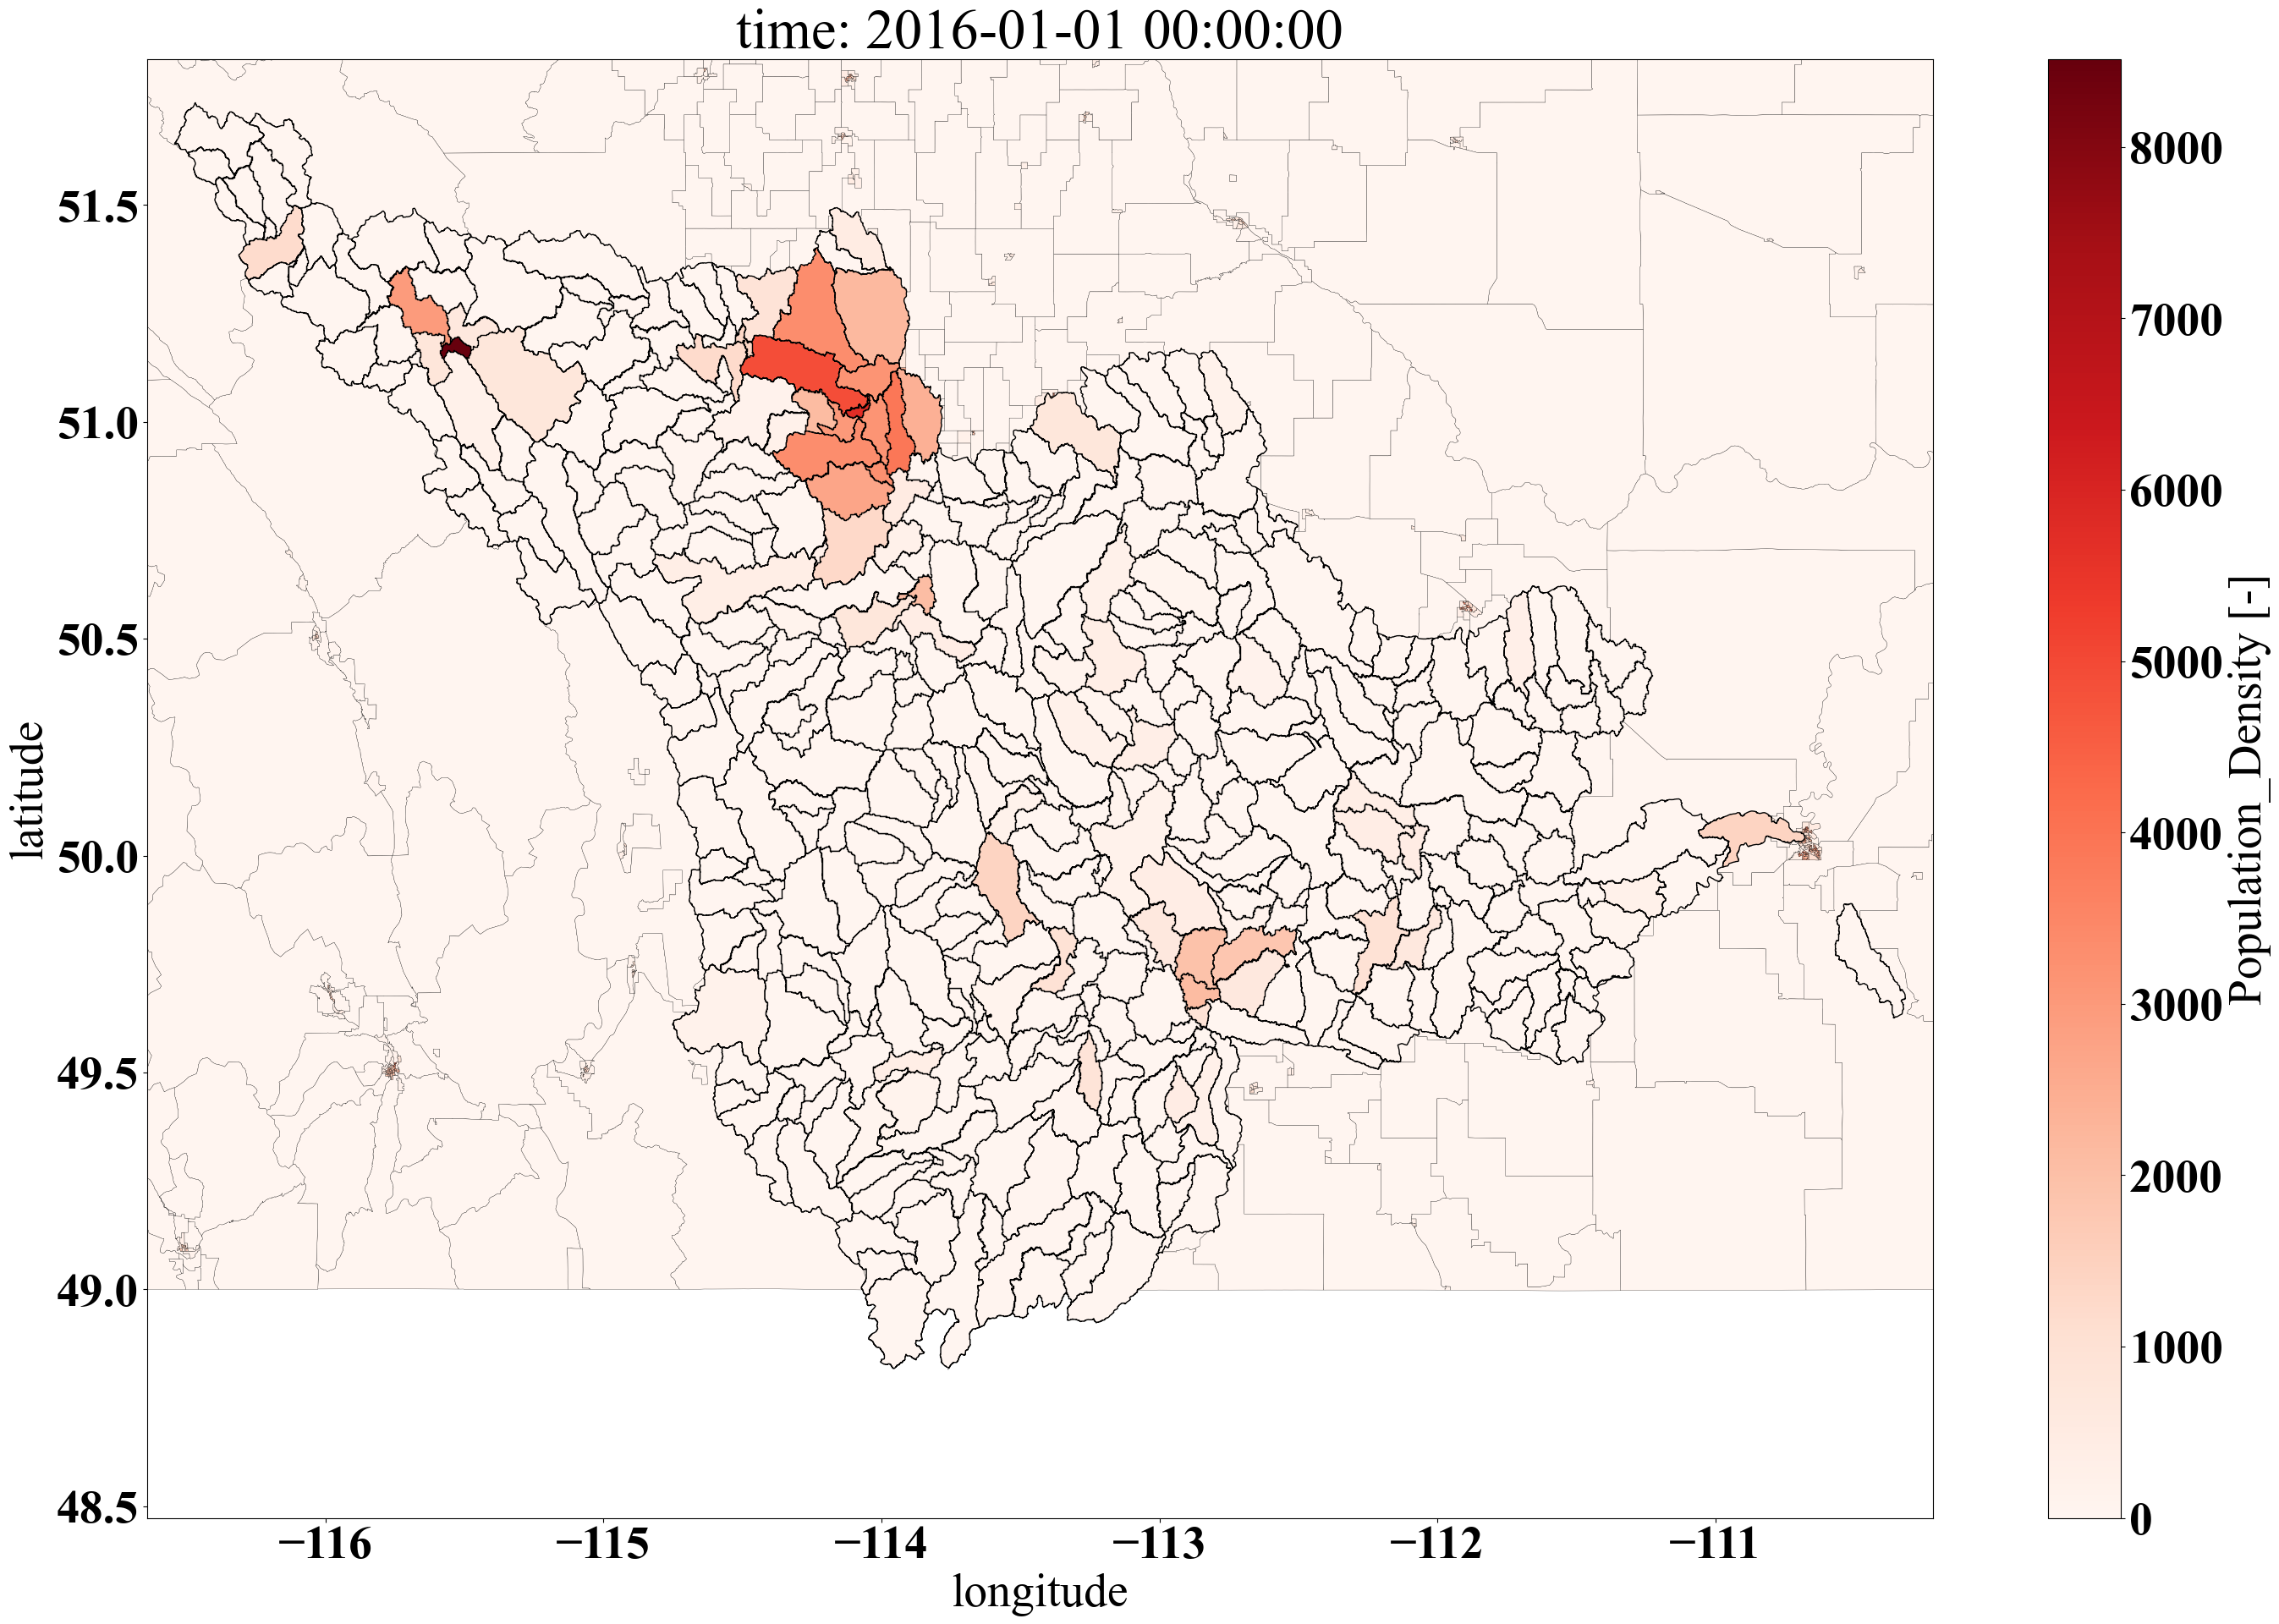

In [2]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# define the source, and target files and parameters
case_name                  = 'Dessimination_Area'
source_nc_name             = './data/Alberta_population/census_2016_DA_Canada.nc'
source_nc_var_lon          = 'lon'
source_nc_var_lat          = 'lat'
source_nc_var_ID           = 'DAUID'
source_nc_var_time         = 'time'
source_nc_var_name         = 'Population_Density'
source_shp_name            = './data/target_shapefiles/dissemination_area.shp'
source_shp_field_ID        = 'DAUID'
remapped_nc_name           = './output/Dessimination_Area_remapped_2016-01-01-00-00-00.nc'
remapped_nc_var_name       = 'Population_Density'
remapped_nc_var_ID         = 'ID'
remapped_nc_var_time       = 'time'
time_step_of_viz           = '2016-01-01 00:00:00'
folder_save_fig            = './fig/'
shp_target_name            = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
shp_target_field_ID        = 'COMID'
cmap                       = 'Reds'
margin                     = 0.1
font_size                  = 40
fig_size                   = (30,20)

# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_ID           = source_nc_var_ID,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            source_shp_name            = source_shp_name,
            source_shp_field_ID        = source_shp_field_ID,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_size                  = font_size,
            fig_size                   = fig_size,
            linewidth_source           = 0.2,
            alpha_source               = 1)


# the source nc file zoom to target shapefile without showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_ID           = source_nc_var_ID,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            source_shp_name            = source_shp_name,
            source_shp_field_ID        = source_shp_field_ID,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            shp_target_name            = shp_target_name,
            show_target_shp_flag       = True,
            fig_name                   = case_name+'_2.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size,
            linewidth_source           = 0.2,
            linewidth_remapped         = 1,
            alpha_source               = 1,
            alpha_remapped             = 1)


# the source nc file zoom to target shapefile with showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_ID           = source_nc_var_ID,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            source_shp_name            = source_shp_name,
            source_shp_field_ID        = source_shp_field_ID,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            shp_target_name            = shp_target_name,
            shp_target_field_ID        = shp_target_field_ID,
            show_target_shp_flag       = True,
            show_remapped_values_flag  = True,
            fig_name                   = case_name+'_3.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size,
            linewidth_source           = 0.2,
            linewidth_remapped         = 1,
            alpha_source               = 1,
            alpha_remapped             = 1)

# merge the two figures into one
from PIL import Image, ImageFont, ImageDraw
image_list = [folder_save_fig+case_name+'_2.png' , folder_save_fig+case_name+'_3.png']
image_list_cropped = [folder_save_fig+case_name+'_cropped_2.png' , folder_save_fig+case_name+'_cropped_3.png']


# crop if needed, can be commneted
im = Image.open(image_list[0])
width, height = im.size      
crop_area = (0, 0, width*0.87, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[0])
#
im = Image.open(image_list[1])
width, height = im.size 
crop_area = (width*0.0622, 0, width, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[1])

# merging
images = [Image.open(x) for x in image_list_cropped]
widths, heights = zip(*(i.size for i in images))
total_width = sum(widths)
max_height = max(heights)
new_im = Image.new('RGB', (total_width, max_height))
x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]
new_im.save(folder_save_fig+case_name+'.png')
new_im.save(folder_save_fig+'DA_population.png')
new_im.show()

